## Garbage Classification Capstone Project.

In [ ]:
#Importing Libraries

import os
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing.image import load_img, ImageDataGenerator

import math
import matplotlib.pyplot as plt

## Data Loading and Analysis.

In [ ]:
# Mounting my Google Drive to access dataset.
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Chamging the dictionary to location of my dataset.

%cd drive/MyDrive/BDWaste_A_comprehensive_image_dataset_of_digestible_and_indigestible_waste_in_Bangladesh/

/content/drive/MyDrive/BDWaste_A_comprehensive_image_dataset_of_digestible_and_indigestible_waste_in_Bangladesh


In [ ]:
# Printing total number of images in each class

for i in os.listdir('BDWaste'):
  print(i,len(os.listdir('BDWaste/'+i)))

Pastic 119
Rice 127
Paper 125
Polythene 120
Mask 129
Wire 120
Bottle 131
Glass 120
Glaves 125
Cane 120
Shell_of_Malta 126
Potato_Peel 130
Lemon_Peel 125
Empty_medicine_packet 131
Coffee_cup 126
Banana_peel 123
Chips_packet 127
Egg_shell 131
Fish_ash 125
Mango_Peel 121
Sugarcane_husk 125


In [ ]:
# Splitting the dataset in training and testing set.

import os
import shutil
from sklearn.model_selection import train_test_split

# Defining the source directory where the images are located
source_dir = '/content/drive/MyDrive/BDWaste_A_comprehensive_image_dataset_of_digestible_and_indigestible_waste_in_Bangladesh/BDWaste/'

# Defining the destination directories for the training and testing sets
train_dir = '/content/drive/MyDrive/BDWaste_A_comprehensive_image_dataset_of_digestible_and_indigestible_waste_in_Bangladesh/train/'
test_dir = '/content/drive/MyDrive/BDWaste_A_comprehensive_image_dataset_of_digestible_and_indigestible_waste_in_Bangladesh/test/'

# Creating the destination directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop through each class and split the images into training and testing sets
for class_name in os.listdir(source_dir):
    class_dir = os.path.join(source_dir, class_name)

    if os.path.isdir(class_dir):
        # Getting a list of all image filenames in the class directory
        image_files = [os.path.join(class_dir, filename) for filename in os.listdir(class_dir) if filename.endswith('.jpg')]

        # Splitting the image filenames into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)

        # Copying the training set images to the training directory
        train_class_dir = os.path.join(train_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        for train_file in train_files:
            shutil.copy(train_file, train_class_dir)

        # Copying the testing set images to the testing directory
        test_class_dir = os.path.join(test_dir, class_name)
        os.makedirs(test_class_dir, exist_ok=True)
        for test_file in test_files:
            shutil.copy(test_file, test_class_dir)

print("Dataset split into training and testing sets successfully.")


Dataset split into training and testing sets successfully.


In [ ]:
# Defining all the path outside of last block so that I do not have to run above code again when i change run time to GPU.

source_dir = '/content/drive/MyDrive/BDWaste_A_comprehensive_image_dataset_of_digestible_and_indigestible_waste_in_Bangladesh/BDWaste/'
train_dir = '/content/drive/MyDrive/BDWaste_A_comprehensive_image_dataset_of_digestible_and_indigestible_waste_in_Bangladesh/train/'
test_dir = '/content/drive/MyDrive/BDWaste_A_comprehensive_image_dataset_of_digestible_and_indigestible_waste_in_Bangladesh/test/'


In [ ]:
# Printing total number of images in each class in traing dataset

for i in os.listdir('train'):
  print(i,len(os.listdir('train/'+i)))

Pastic 95
Rice 101
Paper 99
Polythene 96
Mask 103
Wire 96
Bottle 104
Glass 96
Glaves 100
Cane 96
Shell_of_Malta 100
Potato_Peel 104
Lemon_Peel 100
Empty_medicine_packet 104
Coffee_cup 100
Banana_peel 98
Chips_packet 101
Egg_shell 104
Fish_ash 100
Mango_Peel 96
Sugarcane_husk 100


In [ ]:
# Printing total number of images in each class in test dataset

for i in os.listdir('test'):
  print(i,len(os.listdir('test/'+i)))

Pastic 24
Rice 26
Paper 25
Polythene 24
Mask 26
Wire 24
Bottle 27
Glass 24
Glaves 25
Cane 24
Shell_of_Malta 26
Potato_Peel 26
Lemon_Peel 25
Empty_medicine_packet 27
Coffee_cup 26
Banana_peel 25
Chips_packet 26
Egg_shell 27
Fish_ash 25
Mango_Peel 25
Sugarcane_husk 25


In [ ]:
# Making each image of a standard size

img_width = 180
img_height =180

In [ ]:
# Printing total number of images and classes in my train dataset.

data_train = keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 2093 files belonging to 21 classes.


In [ ]:
data_classes = data_train.class_names

In [ ]:
# Printing names of each class

data_classes

['Banana_peel',
 'Bottle',
 'Cane',
 'Chips_packet',
 'Coffee_cup',
 'Egg_shell',
 'Empty_medicine_packet',
 'Fish_ash',
 'Glass',
 'Glaves',
 'Lemon_Peel',
 'Mango_Peel',
 'Mask',
 'Paper',
 'Pastic',
 'Polythene',
 'Potato_Peel',
 'Rice',
 'Shell_of_Malta',
 'Sugarcane_husk',
 'Wire']

In [ ]:
# Printing total number of images and classes in my test dataset.

data_test = tf.keras.utils.image_dataset_from_directory(
test_dir,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 532 files belonging to 21 classes.


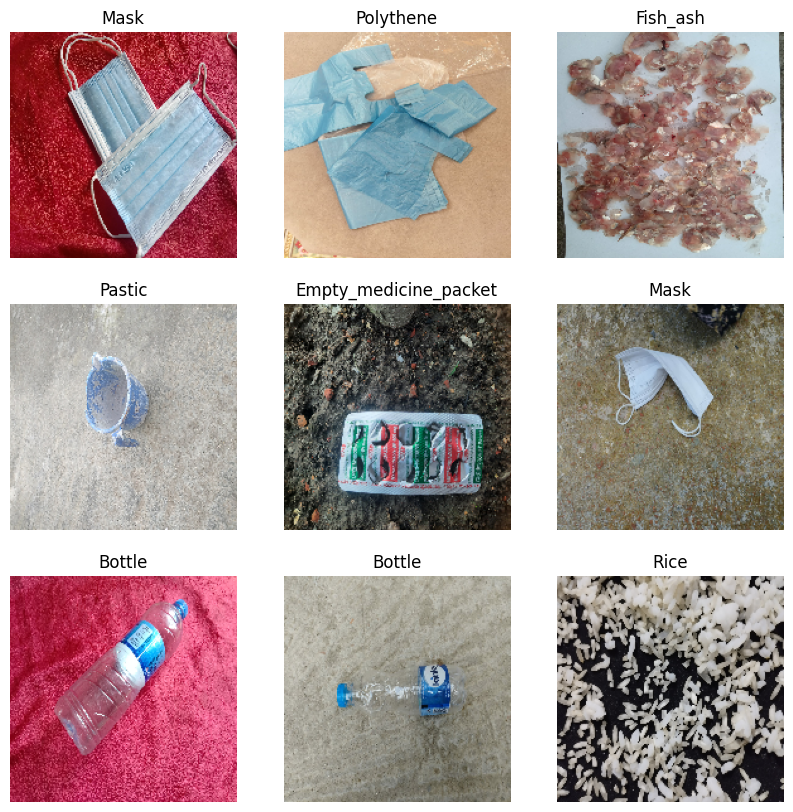

In [ ]:
# Printing some images of dataset.

plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_classes[labels[i]])
        plt.axis('off')

## Model Creation and Training

In [ ]:
# Here I am using sequential model from keras library.

from keras.models import Sequential
from keras import layers

data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Defining the layers of model.

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(1024, activation='relu'),
    layers.Dense(len(data_classes))
])

In [ ]:
# Defining optimizer and loss function.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Training the model.

epochs_size = 25
history = model.fit(data_train, validation_data=data_test, epochs=epochs_size)

Epoch 1/25
66/66 [==============================] - 192s 3s/step - loss: 0.1554 - accuracy: 0.9508 - val_loss: 0.6531 - val_accuracy: 0.8233
Epoch 2/25
66/66 [==============================] - 197s 3s/step - loss: 0.1837 - accuracy: 0.9331 - val_loss: 0.5945 - val_accuracy: 0.8684
Epoch 3/25
66/66 [==============================] - 199s 3s/step - loss: 0.1228 - accuracy: 0.9642 - val_loss: 0.5601 - val_accuracy: 0.8722
Epoch 4/25
66/66 [==============================] - 195s 3s/step - loss: 0.1024 - accuracy: 0.9637 - val_loss: 0.5772 - val_accuracy: 0.9004
Epoch 5/25
66/66 [==============================] - 196s 3s/step - loss: 0.1571 - accuracy: 0.9541 - val_loss: 0.3837 - val_accuracy: 0.9192
Epoch 6/25
66/66 [==============================] - 196s 3s/step - loss: 0.1465 - accuracy: 0.9551 - val_loss: 0.3996 - val_accuracy: 0.8966
Epoch 7/25
66/66 [==============================] - 201s 3s/step - loss: 0.1436 - accuracy: 0.9541 - val_loss: 0.3748 - val_accuracy: 0.9229
Epoch 8/25
66

Text(0.5, 1.0, 'Loss')

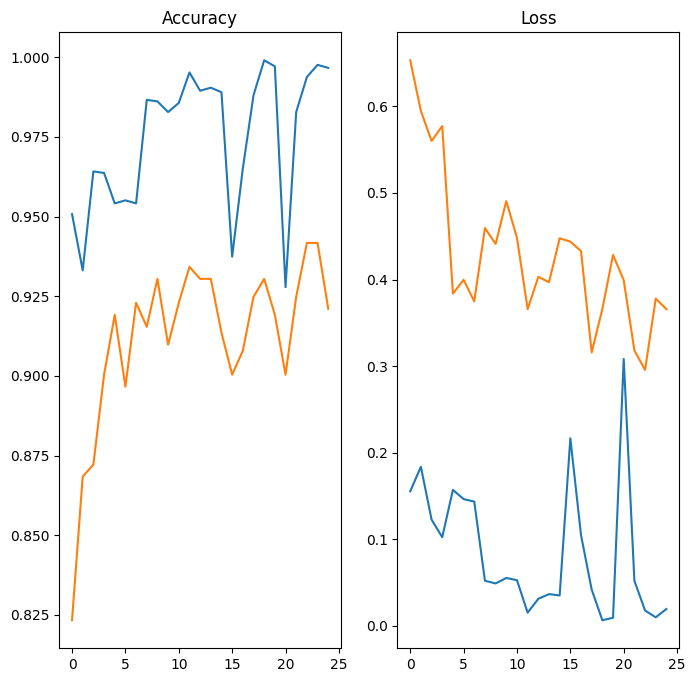

In [ ]:
# Displaying a graph for Accuracy and Loss in train and test data.

epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [ ]:
# Saving the model to use it for web interface.

model.save('Garbage_Classification_Final.keras')

In [ ]:
# Testing the model

image = "/content/Lemon.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [ ]:
predict = model.predict(img_bat)

1/1 [==============================] - 2s 2s/step


In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print('Given image is {} with accuracy of {:0.2f}'.format(data_classes[np.argmax(score)],np.max(score)*100))

Given image is Lemon_Peel with accuracy of 100.00


In [ ]:
model.save('Garbage_Classification_Final.keras')